# ЗАДАНИЕ ДЛЯ ПРОГРАММИРУЮЩИХ

**Ссылка**, на источник текста:

In [1]:
DATA_URL = "http://az.lib.ru/t/tolstoj_a_k/text_0180.shtml"

Устанавливаем библиотеки:



In [2]:
import warnings
warnings.filterwarnings('ignore')
!pip install -q git+https://github.com/dvolchek/rnnmorph.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Создаём объект морфологического анализатора `RNNMorph`:

In [3]:
from rnnmorph.predictor import RNNMorphPredictor

In [4]:
predictor = RNNMorphPredictor(language="ru")

Скачиваем текст, по которому будет дано задание, с помощью `urllib`:

In [5]:
import urllib.request

In [6]:
opener = urllib.request.URLopener({})
resource = opener.open(DATA_URL)
raw_text = resource.read().decode(resource.headers.get_content_charset()) # текст с html-тегами

In [7]:
raw_text[:200]

'<html>\r\n<head>\r\n<title>Lib.ru/Классика: Толстой Алексей Константинович. Семья вурдалака</title>\r\n</head>\r\n\r\n<body>\r\n\r\n\r\n<center>\r\n\r\n<h2><a href=/t/tolstoj_a_k/>Толстой Алексей Константинович</a><br>\r\n'

Как видно, текст содержит html теги, от которых нужно избавиться. Выбрасываем из текста HTML-теги с помощью библиотеки Beatiful soap:

In [8]:
from bs4 import BeautifulSoup

In [9]:
soup = BeautifulSoup(raw_text, features="html.parser")

# Уничтожим все элементы script и style
for script in soup(["script", "style"]):
    script.extract()    # Извлечем

# Получим текст
cleaned_text = soup.get_text()

In [10]:
cleaned_text[:200]

'\n\nLib.ru/Классика: Толстой Алексей Константинович. Семья вурдалака\n\n\n\nТолстой Алексей Константинович\r\nСемья вурдалака\n\n\nLib.ru/Классика:\n\r\n\n\n[Регистрация]\n \n\r\n\r\n\r\n[Найти] \r\n[Рейтинги]\r\n[Обсуждения]\r\n['

С помощью библиотеки [NLTK](https://nltk.org/) разбиваем текст на предложения и токены.

In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
tokenized_sentences = [word_tokenize(sentence) for sentence in sent_tokenize(cleaned_text)]
"Всего %d предложений" % len(tokenized_sentences)

'Всего 576 предложений'

# Задание 1
С помощью метода `str.isalpha` из стандартной библиотеки Python модифицируйте нижеследующий код так, чтобы в predictions остались только буквенные токены.

In [13]:
from tqdm import tqdm

In [14]:
predictions = [[pred.normal_form for pred in sent]
               for sent in tqdm(predictor.predict_sentences(sentences=tokenized_sentences), "sentences") ]

predictions[-11:-10] # Сейчас видно, что токены типа "точка", "запятая" и т.д. пока присутствуют в предложениях. От них нужно избавиться

9/9 [==============================] - 7s 570ms/step


sentences: 100%|██████████| 576/576 [00:00<00:00, 120266.78it/s]


[['другой',
  'ребёнок',
  'я',
  'такой',
  'же',
  'образ',
  'кинуть',
  'вслед',
  ',',
  'но',
  'он',
  'упасть',
  'прямо',
  'под',
  'копыто',
  'лошадь',
  'и',
  'быть',
  'раздавленный',
  '.']]

In [15]:
predictions = [[pred.normal_form for pred in sent if pred.normal_form.isalpha()]
               for sent in tqdm(predictor.predict_sentences(sentences=tokenized_sentences), "sentences")]

print(predictions[-11:-10])

9/9 [==============================] - 5s 613ms/step


sentences: 100%|██████████| 576/576 [00:00<00:00, 149140.02it/s]

[['другой', 'ребёнок', 'я', 'такой', 'же', 'образ', 'кинуть', 'вслед', 'но', 'он', 'упасть', 'прямо', 'под', 'копыто', 'лошадь', 'и', 'быть', 'раздавленный']]


Проверьте себя. Должны получиться следующие значения:

*   Предложений: 577 (возможны расхождения в несколько предложений)
*   Токенов: примерно 8621 (возможны расхождения в некоторое количество токенов)

In [16]:
len(predictions)

576

In [17]:
non_uniq_tokens = [word for sentence in predictions for word in sentence]
len(non_uniq_tokens)

8619

Для продолжения работы над заданием числа должны быть близки к указанным.

# Задание 2

Используя `non_uniq_tokens`, стоп-слова для русского языка из библиотеки nltk (`nltk.corpus.stopwords`) и `nltk.FreqDist`, вычислите, **какую долю среди 100 самых частотных** токенов в произведении занимают токены, **не относящиеся** к стоп словам.

**Например**, если среди 100 самых частотных слов встречается 25 слов, входящих в стоп лист, значит не входят в стоп лист 75 слов, и их доля составит 0.75.

**Не бойтесь использовать документацию NLTK и тьюториалы.**

In [18]:
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
STOPWORDS = set(stopwords.words("russian"))
stopwords.words("russian")[:5] # Пример стоп-слов

['и', 'в', 'во', 'не', 'что']

In [20]:
# Создадим объект для подсчета частоты встречаемости слов
fdist = FreqDist()

# Произведем подсчет частоты встречаемости слов в non_uniq_tokens
for word in non_uniq_tokens:
    fdist[word.lower()] += 1

# Сделаем сортировку по убыванию частоты встречаемости
sortedDict = sorted(fdist.items(), key=lambda x: x[1], reverse=True)

# Получение 100 самых частотных слов
top_100 = [w[0] for w in sortedDict[:100]]
print(top_100)

['я', 'и', 'он', 'в', 'не', 'что', 'быть', 'на', 'как', 'с', 'мой', 'ты', 'который', 'здёнка', 'а', 'но', 'тот', 'весь', 'же', 'это', 'георгий', 'к', 'у', 'так', 'свой', 'о', 'этот', 'мы', 'за', 'старик', 'уже', 'сказать', 'вы', 'бы', 'то', 'от', 'один', 'себя', 'из', 'когда', 'только', 'да', 'мочь', 'говорить', 'нет', 'по', 'ни', 'знать', 'ребёнок', 'всё', 'тут', 'такой', 'горчить', 'ещё', 'со', 'лицо', 'чтобы', 'отец', 'мальчик', 'глаз', 'кол', 'дом', 'день', 'голос', 'кровь', 'несколько', 'время', 'сам', 'если', 'милостивый', 'государыня', 'пётр', 'увидеть', 'час', 'вот', 'теперь', 'слово', 'рука', 'стать', 'другой', 'сердце', 'ответить', 'вдруг', 'комната', 'окно', 'семья', 'для', 'думать', 'видеть', 'ли', 'ночь', 'дать', 'брат', 'скорый', 'спросить', 'раз', 'милый', 'минута', 'до', 'лишь']


In [21]:
# Посчитаем, сколько стоп-слов входят в топ-100
k = 0
for word in STOPWORDS:
    if word in top_100:
        k += 1

proportion = k / len(top_100)
print(proportion)

0.51


Проверьте себя: должно получиться 0.49 (допустимо небольшое расхождение).

# Задание 3
Вычислите, сколько токенов встречается в тексте **строго больше** 50 раз.

In [22]:
count_over_50 = sum(1 for freq in fdist.values() if freq > 50)
print("Количество токенов, встречающихся более 50 раз:", count_over_50)

Количество токенов, встречающихся более 50 раз: 22


Проверьте себя: должно получиться значение 22 (возможно небольшое расхождение)


# Индивидуальное задание


По [ссылке](http://az.lib.ru/g/gogolx_n_w/text_0050.shtml) находится произведение русской классики. Ваша задача -- применить RNNMorph, для анализа произведения.

1. Найдите количество предложений. Введите целое неотрицательное число (допустимая погрешность: 20 предложений):
    ```
    934
    ```
2. Найдите количество токенов, состоящих только из букв. Введите целое неотрицательное число (допустимая погрешность: 50 токенов):
    ```
    11732
    ```
3. Какую долю среди 50 самых частотных токенов в произведении занимают слова, не входящие в стоп-лист? Десятичный разделитель точка. Ответ округлите до сотых (допустимая погрешность: 0.1):
    ```
    0.28
    ```
4. Сколько токенов встречается в тексте строго больше 100 раз? Введите целое неотрицательное число (допустимая погрешность: 10 токенов):
    ```
    10
    ```


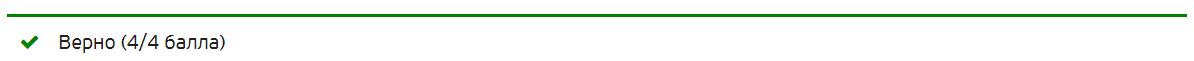

In [23]:
url = "http://az.lib.ru/g/gogolx_n_w/text_0050.shtml"

In [24]:
predictor = RNNMorphPredictor(language="ru")
opener = urllib.request.URLopener({})
resource = opener.open(url)
raw_text = resource.read().decode(resource.headers.get_content_charset())

soup = BeautifulSoup(raw_text, features="html.parser")

for script in soup(["script", "style"]):
    script.extract()

cleaned_text = soup.get_text()
tokenized_sentences = [word_tokenize(sentence) for sentence in sent_tokenize(cleaned_text)]

print("Всего %d предложений." % len(tokenized_sentences))

Всего 934 предложений.


In [25]:
predictions = [[pred.normal_form for pred in sent if pred.normal_form.isalpha()]
               for sent in tqdm(predictor.predict_sentences(sentences=tokenized_sentences), "sentences")]

count_alpha_tokens = 0
for sent in predictions:
    for token in sent:
        if token.isalpha():
            count_alpha_tokens += 1

print("\n\nКоличество токенов, состоящих только из букв:", count_alpha_tokens)

15/15 [==============================] - 8s 447ms/step


sentences: 100%|██████████| 934/934 [00:00<00:00, 113251.42it/s]



Количество токенов, состоящих только из букв: 11732


In [26]:
non_uniq_tokens = [word for sentence in predictions for word in sentence]

In [27]:
fdist = FreqDist()
for word in non_uniq_tokens:
    fdist[word.lower()] += 1

sortedDict = sorted(fdist.items(), key=lambda x: x[1], reverse=True)
top_50 = [w[0] for w in sortedDict[:50]]

In [28]:
k = 0
for word in STOPWORDS:
    if word in top_50:
        k += 1

proportion = 1 - k / len(top_50)
print(proportion)

print("Доля токенов, не относящихся к стоп-листу, среди 50 самых встречаемых:", round(proportion, 2))

0.28
Доля токенов, не относящихся к стоп-листу, среди 50 самых встречаемых: 0.28


In [29]:
count_over_100 = sum(1 for freq in fdist.values() if freq > 100)
print("Количество токенов, встречающихся более 100 раз:", count_over_100)

Количество токенов, встречающихся более 100 раз: 10
